# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:24:20.548512: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:24:23.311853
2025-04-14 20:24:23.311853


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:24:18"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

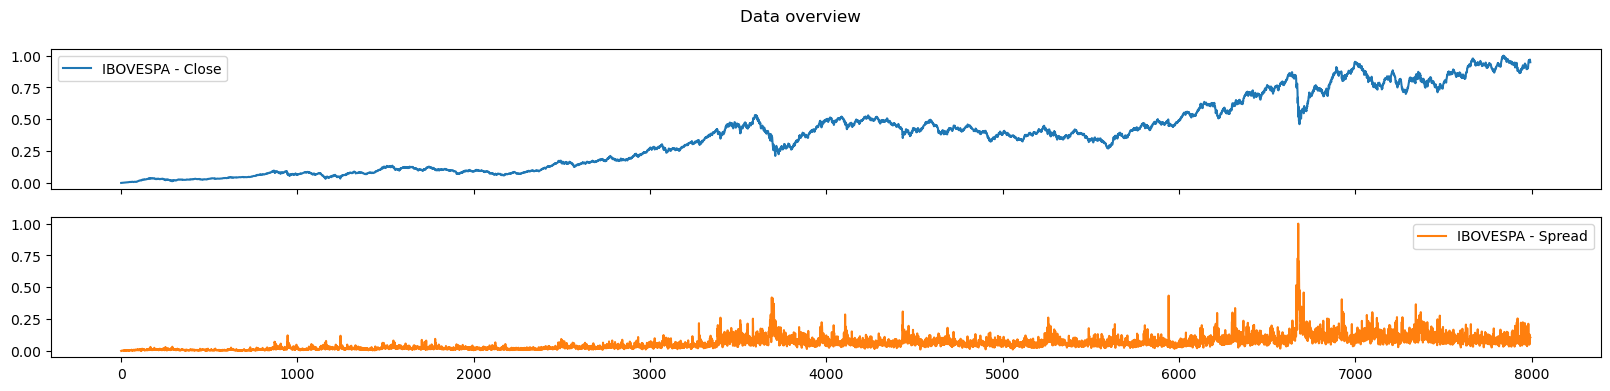

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

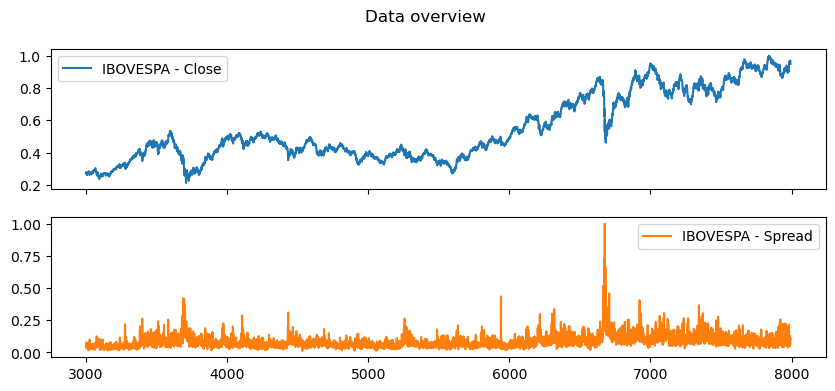

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

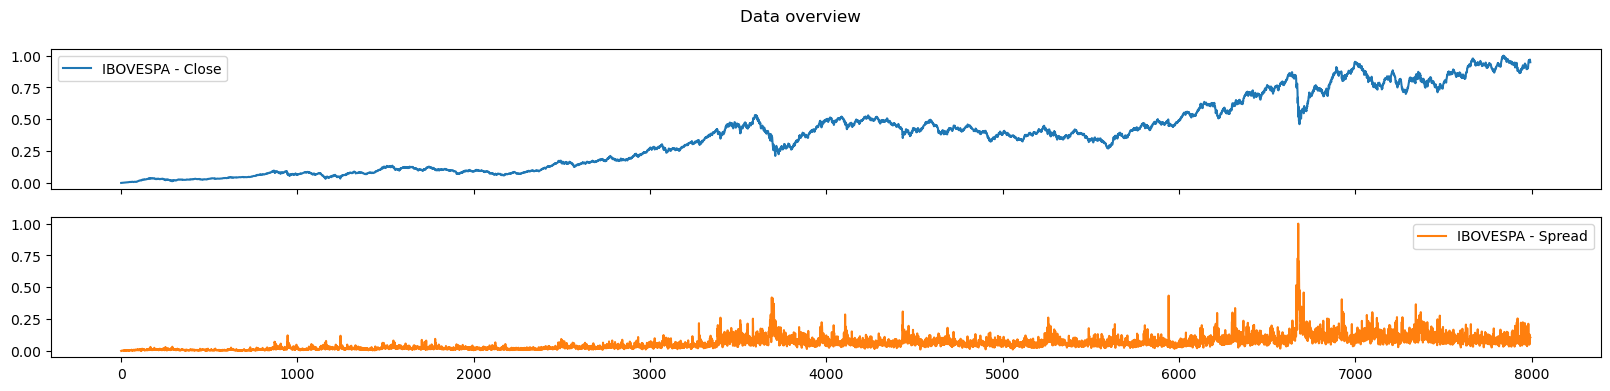

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

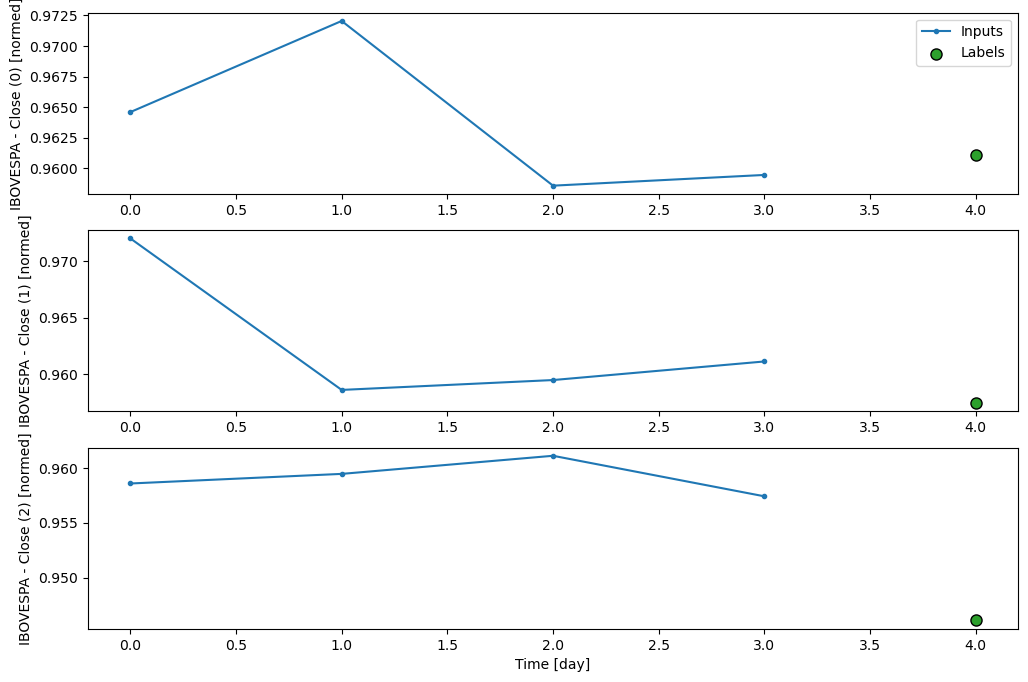

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:08 2s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 59.2868 - mean_squared_error: 1.3531e-04 - root_mean_squared_error: 0.0105  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 50.1131 - mean_squared_error: 1.4251e-04 - root_mean_squared_error: 0.0113

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.7005 - mean_squared_error: 1.4981e-04 - root_mean_squared_error: 0.0118

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.1994 - mean_squared_error: 1.8616e-04 - root_mean_squared_error: 0.0131

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 37.5152 - mean_squared_error: 2.1553e-04 - root_mean_squared_error: 0.0141

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 35.3970 - mean_squared_error: 2.3537e-04 - root_mean_squared_error: 0.0148

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 33.7247 - mean_squared_error: 2.6204e-04 - root_mean_squared_error: 0.0156

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 32.3739 - mean_squared_error: 2.9344e-04 - root_mean_squared_error: 0.0165

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 31.1118 - mean_squared_error: 3.4760e-04 - root_mean_squared_error: 0.0178

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 30.1033 - mean_squared_error: 4.8472e-04 - root_mean_squared_error: 0.0201

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 29.3531 - mean_squared_error: 6.9106e-04 - root_mean_squared_error: 0.0229

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 28.6124 - mean_squared_error: 8.9048e-04 - root_mean_squared_error: 0.0257

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 27.9285 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279    

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 27.2978 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 26.7235 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 26.1875 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 25.6903 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 25.3009 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 25.0241 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372 - val_loss: 0.1282 - val_mean_absolute_error: 0.1282 - val_mean_absolute_percentage_error: 13.7456 - val_mean_squared_error: 0.0175 - val_root_mean_squared_error: 0.1322 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5798 - mean_absolute_error: 0.5798 - mean_absolute_percentage_error: 27203.1133 - mean_squared_error: 0.3361 - root_mean_squared_error: 0.5798

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5511 - mean_absolute_error: 0.5511 - mean_absolute_percentage_error: 9767.9053 - mean_squared_error: 0.3054 - root_mean_squared_error: 0.5522  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4788 - mean_absolute_error: 0.4788 - mean_absolute_percentage_error: 6697.1978 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4965

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 5109.7720 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4432

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 4237.9116 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.4060

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3147 - mean_absolute_error: 0.3147 - mean_absolute_percentage_error: 3643.1428 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3769

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 3208.3689 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3535

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 2850.6553 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3326

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 2590.6978 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3164

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 2378.3296 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.3025

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 2201.3445 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2905

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 2039.8418 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2792

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 1912.3540 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2700

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 1792.6809 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2611

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 1695.9742 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2536

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 1603.3994 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2462

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 1527.3167 - mean_squared_error: 0.0705 - root_mean_squared_error: 0.2400

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 1453.3727 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2339

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 1391.7861 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2287

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 1331.2313 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2235

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 1318.0802 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2224 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 1.8308 - val_mean_squared_error: 4.7737e-04 - val_root_mean_squared_error: 0.0218 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 19660.2500 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.4191

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 6757.3359 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3922  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 4552.0298 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3411

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 3509.4377 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.3033

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 2887.3247 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2757

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 2468.8049 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2547

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 2165.7976 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2380

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 1935.0355 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2243

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 1752.7513 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2128

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 1604.7225 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2029

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 1490.5790 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1950

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - mean_absolute_percentage_error: 1400.5891 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1886

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 1308.5223 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1817

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 1228.8541 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1756

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 1164.2219 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1705

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1102.1254 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1655

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1046.8927 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1609

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 997.4146 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1567 

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 952.8082 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1528

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 927.4736 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1506 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0622 - val_mean_squared_error: 1.5359e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 6098.1079 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1301

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 2071.0000 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1023 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 1358.9996 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0886

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 1040.0806 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0792

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 852.3972 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0722 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 727.1194 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0668

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 636.8384 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0625

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 568.3682 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0590

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 518.1967 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 473.8380 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 439.7447 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 408.4323 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 381.6752 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 361.8768 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 348.8425 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 335.3630 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 322.9832 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 306.7773 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 293.3273 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 280.1464 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 270.8626 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6832 - val_mean_squared_error: 6.2462e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 1167.8689 - mean_squared_error: 6.2234e-04 - root_mean_squared_error: 0.0249

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 349.7746 - mean_squared_error: 3.2136e-04 - root_mean_squared_error: 0.0177  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 234.3850 - mean_squared_error: 2.6274e-04 - root_mean_squared_error: 0.0160

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 180.6556 - mean_squared_error: 2.1925e-04 - root_mean_squared_error: 0.0145

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 148.8920 - mean_squared_error: 1.8950e-04 - root_mean_squared_error: 0.0134

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 128.9514 - mean_squared_error: 1.6925e-04 - root_mean_squared_error: 0.0125

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 113.1513 - mean_squared_error: 1.5219e-04 - root_mean_squared_error: 0.0118

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 101.1516 - mean_squared_error: 1.3872e-04 - root_mean_squared_error: 0.0112

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 92.3455 - mean_squared_error: 1.2865e-04 - root_mean_squared_error: 0.0107 

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.6544 - mean_squared_error: 1.2118e-04 - root_mean_squared_error: 0.0104

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 79.0308 - mean_squared_error: 1.1466e-04 - root_mean_squared_error: 0.0101

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.4637 - mean_squared_error: 1.0963e-04 - root_mean_squared_error: 0.0099

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 68.7176 - mean_squared_error: 1.0625e-04 - root_mean_squared_error: 0.0098

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.9107 - mean_squared_error: 1.0374e-04 - root_mean_squared_error: 0.0097

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 61.5532 - mean_squared_error: 1.0179e-04 - root_mean_squared_error: 0.0096

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 58.3343 - mean_squared_error: 1.0027e-04 - root_mean_squared_error: 0.0096

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 55.4812 - mean_squared_error: 1.0076e-04 - root_mean_squared_error: 0.0096

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 52.9297 - mean_squared_error: 1.0238e-04 - root_mean_squared_error: 0.0097

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 50.6299 - mean_squared_error: 1.0425e-04 - root_mean_squared_error: 0.0098

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 49.0091 - mean_squared_error: 1.0574e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0464 - val_mean_squared_error: 1.3038e-04 - val_root_mean_squared_error: 0.0114 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 4017.2217 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0857

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 1339.0658 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0632 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 865.1562 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0524 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 658.2525 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 538.1049 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 463.4830 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 404.8043 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 363.5364 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 328.1691 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 301.6502 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 277.7911 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 259.1823 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 241.8926 - mean_squared_error: 9.6231e-04 - root_mean_squared_error: 0.0279

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 228.0444 - mean_squared_error: 9.1207e-04 - root_mean_squared_error: 0.0271

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 215.8387 - mean_squared_error: 8.6759e-04 - root_mean_squared_error: 0.0264

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 204.1425 - mean_squared_error: 8.2488e-04 - root_mean_squared_error: 0.0256

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 193.7614 - mean_squared_error: 7.8689e-04 - root_mean_squared_error: 0.0250

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 185.1583 - mean_squared_error: 7.5562e-04 - root_mean_squared_error: 0.0244

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 176.7388 - mean_squared_error: 7.2544e-04 - root_mean_squared_error: 0.0239

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 169.6824 - mean_squared_error: 7.0042e-04 - root_mean_squared_error: 0.0234 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6862 - val_mean_squared_error: 6.4538e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 2486.4111 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0530

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 780.3351 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373  

 28/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 507.6949 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 400.7214 - mean_squared_error: 9.2940e-04 - root_mean_squared_error: 0.0295

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 334.5472 - mean_squared_error: 8.0904e-04 - root_mean_squared_error: 0.0274

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 288.8563 - mean_squared_error: 7.1834e-04 - root_mean_squared_error: 0.0256

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 252.7797 - mean_squared_error: 6.4242e-04 - root_mean_squared_error: 0.0241

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 229.2448 - mean_squared_error: 5.9100e-04 - root_mean_squared_error: 0.0230

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 211.7164 - mean_squared_error: 5.5192e-04 - root_mean_squared_error: 0.0221

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 192.9480 - mean_squared_error: 5.1000e-04 - root_mean_squared_error: 0.0211

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 177.5531 - mean_squared_error: 4.7675e-04 - root_mean_squared_error: 0.0204

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 165.5970 - mean_squared_error: 4.5294e-04 - root_mean_squared_error: 0.0198

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 156.9224 - mean_squared_error: 4.3583e-04 - root_mean_squared_error: 0.0195

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 148.4749 - mean_squared_error: 4.1882e-04 - root_mean_squared_error: 0.0191

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 140.3388 - mean_squared_error: 4.0205e-04 - root_mean_squared_error: 0.0187

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 132.5721 - mean_squared_error: 3.8577e-04 - root_mean_squared_error: 0.0183

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 125.7021 - mean_squared_error: 3.7111e-04 - root_mean_squared_error: 0.0179

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 119.5764 - mean_squared_error: 3.5793e-04 - root_mean_squared_error: 0.0176

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 114.4812 - mean_squared_error: 3.4735e-04 - root_mean_squared_error: 0.0173

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 109.4771 - mean_squared_error: 3.3712e-04 - root_mean_squared_error: 0.0171

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 107.3280 - mean_squared_error: 3.3276e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6294 - val_mean_squared_error: 5.3454e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 2276.0933 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 715.2417 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 474.3369 - mean_squared_error: 9.1650e-04 - root_mean_squared_error: 0.0294

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 363.9323 - mean_squared_error: 7.4245e-04 - root_mean_squared_error: 0.0262

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 303.0974 - mean_squared_error: 6.3861e-04 - root_mean_squared_error: 0.0241

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 255.6471 - mean_squared_error: 5.5340e-04 - root_mean_squared_error: 0.0222

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 226.4256 - mean_squared_error: 4.9851e-04 - root_mean_squared_error: 0.0210

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 202.1431 - mean_squared_error: 4.5180e-04 - root_mean_squared_error: 0.0199

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 184.3689 - mean_squared_error: 4.1752e-04 - root_mean_squared_error: 0.0190

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 168.6635 - mean_squared_error: 3.8779e-04 - root_mean_squared_error: 0.0183

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 155.6953 - mean_squared_error: 3.6631e-04 - root_mean_squared_error: 0.0177

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 144.7885 - mean_squared_error: 3.5170e-04 - root_mean_squared_error: 0.0174

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 135.4574 - mean_squared_error: 3.3883e-04 - root_mean_squared_error: 0.0172

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 127.3728 - mean_squared_error: 3.2719e-04 - root_mean_squared_error: 0.0169

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 120.8117 - mean_squared_error: 3.1779e-04 - root_mean_squared_error: 0.0167

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 114.5072 - mean_squared_error: 3.0907e-04 - root_mean_squared_error: 0.0165

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 108.8995 - mean_squared_error: 3.0239e-04 - root_mean_squared_error: 0.0163

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 104.2409 - mean_squared_error: 2.9751e-04 - root_mean_squared_error: 0.0162

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 99.6708 - mean_squared_error: 2.9337e-04 - root_mean_squared_error: 0.0162 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 97.0742 - mean_squared_error: 2.9111e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7235 - val_mean_squared_error: 7.0199e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 5105.0801 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1088

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 1655.3435 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0842 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 1082.2122 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0689

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 823.2925 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 681.6449 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 578.4658 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 519.8759 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 464.8144 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 418.0150 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 380.5335 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 349.7775 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 324.0392 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 302.1513 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 283.2832 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 268.0263 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 253.4103 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 240.4451 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 228.8593 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 219.2011 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0296

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 211.1024 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.7025 - val_mean_squared_error: 6.5943e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 3947.7695 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 1268.1360 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 829.1592 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 631.3380 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 515.7949 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 438.9887 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 383.8065 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 344.8844 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 311.4630 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 284.4784 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 262.1952 - mean_squared_error: 9.8141e-04 - root_mean_squared_error: 0.0278

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 243.4425 - mean_squared_error: 9.1592e-04 - root_mean_squared_error: 0.0267

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 228.5705 - mean_squared_error: 8.6389e-04 - root_mean_squared_error: 0.0259

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 214.5581 - mean_squared_error: 8.1471e-04 - root_mean_squared_error: 0.0250

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 202.3117 - mean_squared_error: 7.7157e-04 - root_mean_squared_error: 0.0243

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 191.5075 - mean_squared_error: 7.3340e-04 - root_mean_squared_error: 0.0236

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 182.5990 - mean_squared_error: 7.0195e-04 - root_mean_squared_error: 0.0230

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 173.9201 - mean_squared_error: 6.7175e-04 - root_mean_squared_error: 0.0225

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 166.6743 - mean_squared_error: 6.4674e-04 - root_mean_squared_error: 0.0220

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 162.2017 - mean_squared_error: 6.3141e-04 - root_mean_squared_error: 0.0218 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7026 - val_mean_squared_error: 6.6629e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 1830.5315 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 601.8127 - mean_squared_error: 8.3013e-04 - root_mean_squared_error: 0.0284

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 392.6526 - mean_squared_error: 6.2633e-04 - root_mean_squared_error: 0.0244

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 299.4576 - mean_squared_error: 5.0753e-04 - root_mean_squared_error: 0.0218

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 245.2159 - mean_squared_error: 4.3090e-04 - root_mean_squared_error: 0.0199

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 211.5175 - mean_squared_error: 3.8065e-04 - root_mean_squared_error: 0.0185

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 192.3830 - mean_squared_error: 3.5129e-04 - root_mean_squared_error: 0.0177

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 169.2966 - mean_squared_error: 3.1497e-04 - root_mean_squared_error: 0.0167

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 153.9118 - mean_squared_error: 2.9039e-04 - root_mean_squared_error: 0.0159

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 141.3632 - mean_squared_error: 2.7075e-04 - root_mean_squared_error: 0.0153

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 130.1190 - mean_squared_error: 2.5438e-04 - root_mean_squared_error: 0.0148

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 120.7211 - mean_squared_error: 2.4292e-04 - root_mean_squared_error: 0.0145

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 112.7253 - mean_squared_error: 2.3348e-04 - root_mean_squared_error: 0.0143

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 105.8251 - mean_squared_error: 2.2497e-04 - root_mean_squared_error: 0.0140

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 100.2410 - mean_squared_error: 2.1790e-04 - root_mean_squared_error: 0.0138

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 94.8879 - mean_squared_error: 2.1098e-04 - root_mean_squared_error: 0.0136 

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 90.4824 - mean_squared_error: 2.0538e-04 - root_mean_squared_error: 0.0135

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 86.1985 - mean_squared_error: 2.0071e-04 - root_mean_squared_error: 0.0133

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 82.3478 - mean_squared_error: 1.9840e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 78.8638 - mean_squared_error: 1.9690e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8837 - val_mean_squared_error: 1.0280e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 2979.1455 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0635

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 992.1538 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 635.6893 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 480.2141 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 390.5379 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 331.4175 - mean_squared_error: 8.5802e-04 - root_mean_squared_error: 0.0269

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 289.1997 - mean_squared_error: 7.5431e-04 - root_mean_squared_error: 0.0249

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 257.3694 - mean_squared_error: 6.7525e-04 - root_mean_squared_error: 0.0234

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 232.4260 - mean_squared_error: 6.1319e-04 - root_mean_squared_error: 0.0221

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 212.2999 - mean_squared_error: 5.6379e-04 - root_mean_squared_error: 0.0211

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 196.8676 - mean_squared_error: 5.2732e-04 - root_mean_squared_error: 0.0204

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 182.7253 - mean_squared_error: 4.9521e-04 - root_mean_squared_error: 0.0197

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 171.5216 - mean_squared_error: 4.6970e-04 - root_mean_squared_error: 0.0192

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 160.9732 - mean_squared_error: 4.4542e-04 - root_mean_squared_error: 0.0187

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 151.1042 - mean_squared_error: 4.2272e-04 - root_mean_squared_error: 0.0182

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 143.0609 - mean_squared_error: 4.0410e-04 - root_mean_squared_error: 0.0178

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 136.4297 - mean_squared_error: 3.8895e-04 - root_mean_squared_error: 0.0174

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 129.9724 - mean_squared_error: 3.7554e-04 - root_mean_squared_error: 0.0172

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 124.1571 - mean_squared_error: 3.6483e-04 - root_mean_squared_error: 0.0170

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 121.2577 - mean_squared_error: 3.5955e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7559 - val_mean_squared_error: 7.7199e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 2837.9587 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0605

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 942.9330 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 605.0046 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 457.6932 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 372.5754 - mean_squared_error: 9.0712e-04 - root_mean_squared_error: 0.0280

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 327.6044 - mean_squared_error: 8.0479e-04 - root_mean_squared_error: 0.0261

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 287.2951 - mean_squared_error: 7.1153e-04 - root_mean_squared_error: 0.0244

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 256.6224 - mean_squared_error: 6.3964e-04 - root_mean_squared_error: 0.0229

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 230.6256 - mean_squared_error: 5.7834e-04 - root_mean_squared_error: 0.0216

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 209.8584 - mean_squared_error: 5.2973e-04 - root_mean_squared_error: 0.0206

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 192.8489 - mean_squared_error: 4.9083e-04 - root_mean_squared_error: 0.0197

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 178.6371 - mean_squared_error: 4.5926e-04 - root_mean_squared_error: 0.0191

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 166.5632 - mean_squared_error: 4.3283e-04 - root_mean_squared_error: 0.0185

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 156.1612 - mean_squared_error: 4.0988e-04 - root_mean_squared_error: 0.0180

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 147.0993 - mean_squared_error: 3.8988e-04 - root_mean_squared_error: 0.0175

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 139.1264 - mean_squared_error: 3.7224e-04 - root_mean_squared_error: 0.0171

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 132.0518 - mean_squared_error: 3.5681e-04 - root_mean_squared_error: 0.0167

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 125.7300 - mean_squared_error: 3.4400e-04 - root_mean_squared_error: 0.0165

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 120.0441 - mean_squared_error: 3.3375e-04 - root_mean_squared_error: 0.0162

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 116.0426 - mean_squared_error: 3.2675e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7809 - val_mean_squared_error: 8.1916e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 2801.9080 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0597

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 932.9844 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 630.5717 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 468.1458 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 377.3059 - mean_squared_error: 9.0527e-04 - root_mean_squared_error: 0.0279

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 318.4265 - mean_squared_error: 7.7208e-04 - root_mean_squared_error: 0.0255

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 276.8070 - mean_squared_error: 6.7628e-04 - root_mean_squared_error: 0.0236

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 247.7762 - mean_squared_error: 6.0873e-04 - root_mean_squared_error: 0.0222

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 223.0590 - mean_squared_error: 5.5098e-04 - root_mean_squared_error: 0.0210

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 203.2382 - mean_squared_error: 5.0503e-04 - root_mean_squared_error: 0.0200

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 186.9581 - mean_squared_error: 4.6815e-04 - root_mean_squared_error: 0.0192

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 173.3197 - mean_squared_error: 4.3772e-04 - root_mean_squared_error: 0.0185

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 162.5415 - mean_squared_error: 4.1385e-04 - root_mean_squared_error: 0.0180

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 152.4142 - mean_squared_error: 3.9132e-04 - root_mean_squared_error: 0.0174

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 143.5891 - mean_squared_error: 3.7184e-04 - root_mean_squared_error: 0.0170

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 135.8207 - mean_squared_error: 3.5465e-04 - root_mean_squared_error: 0.0166

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 129.4276 - mean_squared_error: 3.4066e-04 - root_mean_squared_error: 0.0162

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 123.2116 - mean_squared_error: 3.2802e-04 - root_mean_squared_error: 0.0159

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 117.6226 - mean_squared_error: 3.1805e-04 - root_mean_squared_error: 0.0157

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 113.6899 - mean_squared_error: 3.1125e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8629 - val_mean_squared_error: 9.7617e-05 - val_root_mean_squared_error: 0.0099 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 2333.2002 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 776.9868 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 503.8995 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 383.2951 - mean_squared_error: 8.0306e-04 - root_mean_squared_error: 0.0271

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 317.5289 - mean_squared_error: 6.8203e-04 - root_mean_squared_error: 0.0247

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 275.9666 - mean_squared_error: 6.0238e-04 - root_mean_squared_error: 0.0230

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 240.1664 - mean_squared_error: 5.3179e-04 - root_mean_squared_error: 0.0215

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 215.1913 - mean_squared_error: 4.8145e-04 - root_mean_squared_error: 0.0203

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 193.9091 - mean_squared_error: 4.3803e-04 - root_mean_squared_error: 0.0192

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 178.0227 - mean_squared_error: 4.0569e-04 - root_mean_squared_error: 0.0184

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 163.7792 - mean_squared_error: 3.7736e-04 - root_mean_squared_error: 0.0177

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 152.7044 - mean_squared_error: 3.5575e-04 - root_mean_squared_error: 0.0172

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 142.4378 - mean_squared_error: 3.3587e-04 - root_mean_squared_error: 0.0166

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 133.5911 - mean_squared_error: 3.1865e-04 - root_mean_squared_error: 0.0162

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 126.4404 - mean_squared_error: 3.0475e-04 - root_mean_squared_error: 0.0158

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 119.5922 - mean_squared_error: 2.9142e-04 - root_mean_squared_error: 0.0155

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 113.5173 - mean_squared_error: 2.7971e-04 - root_mean_squared_error: 0.0151

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 108.0901 - mean_squared_error: 2.6999e-04 - root_mean_squared_error: 0.0149

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 103.2107 - mean_squared_error: 2.6253e-04 - root_mean_squared_error: 0.0147

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 99.1210 - mean_squared_error: 2.5660e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7286 - val_mean_squared_error: 7.2043e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 2520.9604 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 837.7679 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 538.1295 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 407.5428 - mean_squared_error: 8.6932e-04 - root_mean_squared_error: 0.0278

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 332.1109 - mean_squared_error: 7.2184e-04 - root_mean_squared_error: 0.0250

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 285.5312 - mean_squared_error: 6.2830e-04 - root_mean_squared_error: 0.0231

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 249.0988 - mean_squared_error: 5.5384e-04 - root_mean_squared_error: 0.0216

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 221.6897 - mean_squared_error: 4.9704e-04 - root_mean_squared_error: 0.0203

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 200.2195 - mean_squared_error: 4.5216e-04 - root_mean_squared_error: 0.0192

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 182.8982 - mean_squared_error: 4.1619e-04 - root_mean_squared_error: 0.0183

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 168.6046 - mean_squared_error: 3.8721e-04 - root_mean_squared_error: 0.0176

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 156.5824 - mean_squared_error: 3.6311e-04 - root_mean_squared_error: 0.0170

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 146.3147 - mean_squared_error: 3.4264e-04 - root_mean_squared_error: 0.0165

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 137.4313 - mean_squared_error: 3.2482e-04 - root_mean_squared_error: 0.0161

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 130.2271 - mean_squared_error: 3.1039e-04 - root_mean_squared_error: 0.0157

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 123.3065 - mean_squared_error: 2.9649e-04 - root_mean_squared_error: 0.0153

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 117.1519 - mean_squared_error: 2.8431e-04 - root_mean_squared_error: 0.0150

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 111.6415 - mean_squared_error: 2.7442e-04 - root_mean_squared_error: 0.0147

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 107.0405 - mean_squared_error: 2.6688e-04 - root_mean_squared_error: 0.0146

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 104.1995 - mean_squared_error: 2.6231e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6709 - val_mean_squared_error: 6.1643e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 1732.6584 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 542.4233 - mean_squared_error: 6.8682e-04 - root_mean_squared_error: 0.0256

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 359.4559 - mean_squared_error: 5.1455e-04 - root_mean_squared_error: 0.0220

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 281.3074 - mean_squared_error: 4.3024e-04 - root_mean_squared_error: 0.0200

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 240.2887 - mean_squared_error: 3.8028e-04 - root_mean_squared_error: 0.0187

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 203.3768 - mean_squared_error: 3.3173e-04 - root_mean_squared_error: 0.0173

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 177.2184 - mean_squared_error: 2.9530e-04 - root_mean_squared_error: 0.0162

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 157.5943 - mean_squared_error: 2.6692e-04 - root_mean_squared_error: 0.0153

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 142.2609 - mean_squared_error: 2.4422e-04 - root_mean_squared_error: 0.0146

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 129.9128 - mean_squared_error: 2.2594e-04 - root_mean_squared_error: 0.0140

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 119.7400 - mean_squared_error: 2.1153e-04 - root_mean_squared_error: 0.0135

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 111.1925 - mean_squared_error: 1.9951e-04 - root_mean_squared_error: 0.0131

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 103.9013 - mean_squared_error: 1.8948e-04 - root_mean_squared_error: 0.0127

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 97.5991 - mean_squared_error: 1.8081e-04 - root_mean_squared_error: 0.0124 

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 92.0941 - mean_squared_error: 1.7337e-04 - root_mean_squared_error: 0.0122

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 87.2376 - mean_squared_error: 1.6679e-04 - root_mean_squared_error: 0.0119

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 82.9182 - mean_squared_error: 1.6117e-04 - root_mean_squared_error: 0.0117

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 79.0517 - mean_squared_error: 1.5726e-04 - root_mean_squared_error: 0.0116

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 75.5682 - mean_squared_error: 1.5481e-04 - root_mean_squared_error: 0.0116

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 73.5897 - mean_squared_error: 1.5351e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6806 - val_mean_squared_error: 6.2997e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0065


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:21s:621ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:24:49.423017: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:24:18',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:21s:621ms',
 'TRAINING_EPOCHS': 17,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 20:24:49.623990: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 2367.6536 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0505

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 892.3234 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497   

 23/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 635.2971 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 511.6223 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 420.0062 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 371.9729 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 338.8910 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0484

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 310.3272 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 285.1858 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 261.3129 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 241.6307 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 225.0874 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 207.2801 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 191.7010 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 179.2585 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 168.5364 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 159.1705 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 152.6597 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433


Loss: 0.03298712894320488 - MAE: 0.03298712894320488 - MSE: 0.0012794544454663992 - MAPE: 47.0003662109375 - RMSE: 0.03576946258544922


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 0.8640 - mean_squared_error: 8.7021e-05 - root_mean_squared_error: 0.0093

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 0.7216 - mean_squared_error: 6.7756e-05 - root_mean_squared_error: 0.0082 


Loss: 0.0063006277196109295 - MAE: 0.0063006277196109295 - MSE: 6.299731467152014e-05 - MAPE: 0.6805513501167297 - RMSE: 0.007937084883451462


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 0.4925 - mean_squared_error: 4.2539e-05 - root_mean_squared_error: 0.0065

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 0.7117 - mean_squared_error: 7.7605e-05 - root_mean_squared_error: 0.0087


Loss: 0.00722253043204546 - MAE: 0.00722253043204546 - MSE: 8.864749543135986e-05 - MAPE: 0.7862556576728821 - RMSE: 0.00941528007388115


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

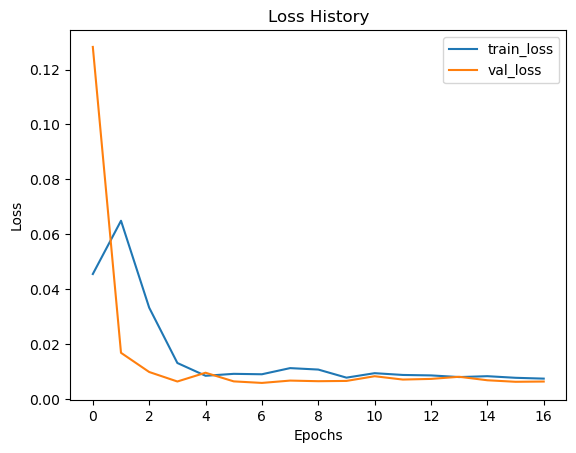

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

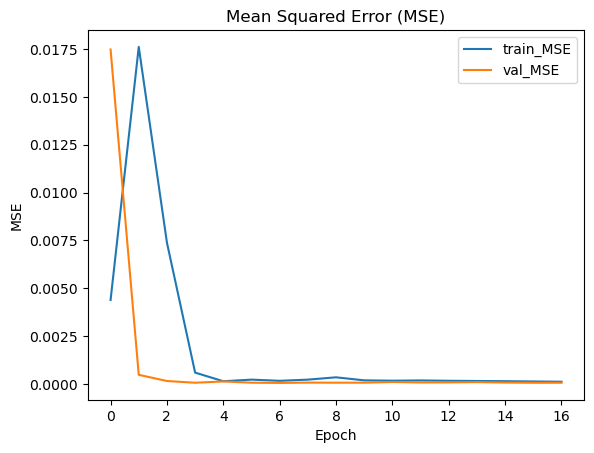

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

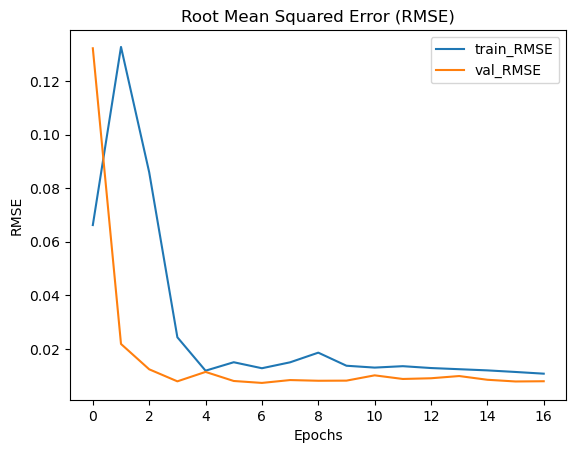

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

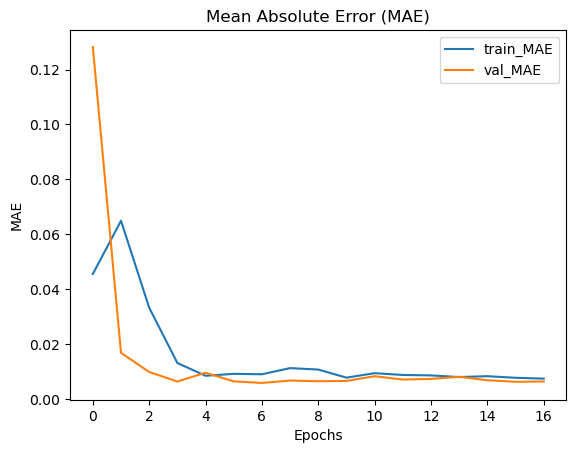

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

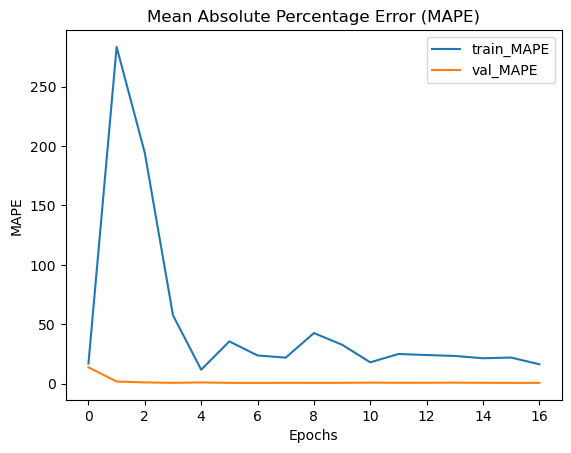

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:24:53.145257: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


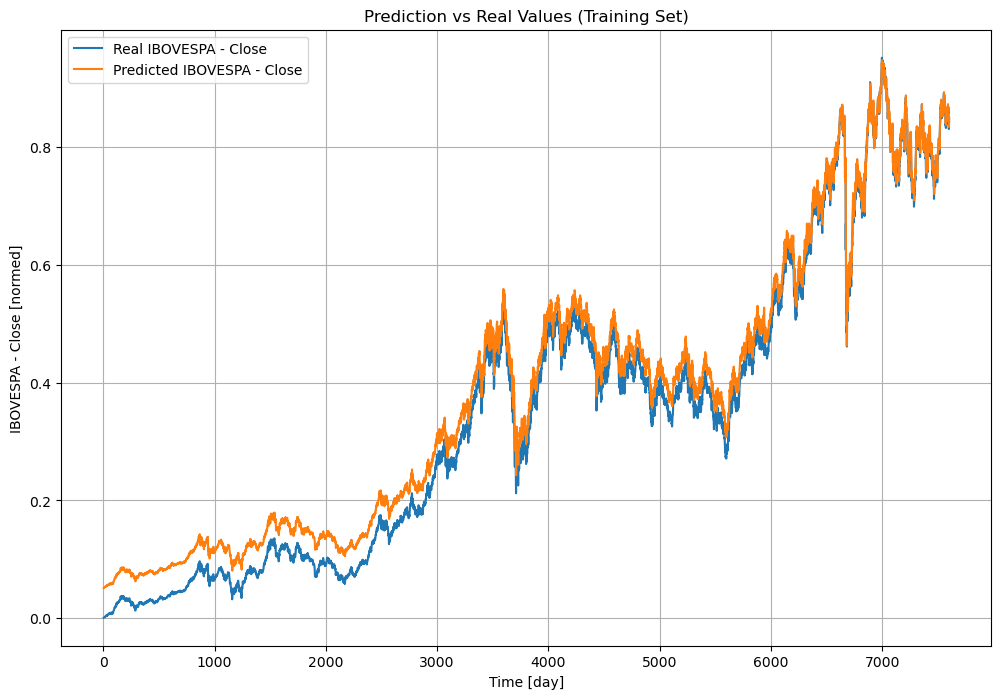

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


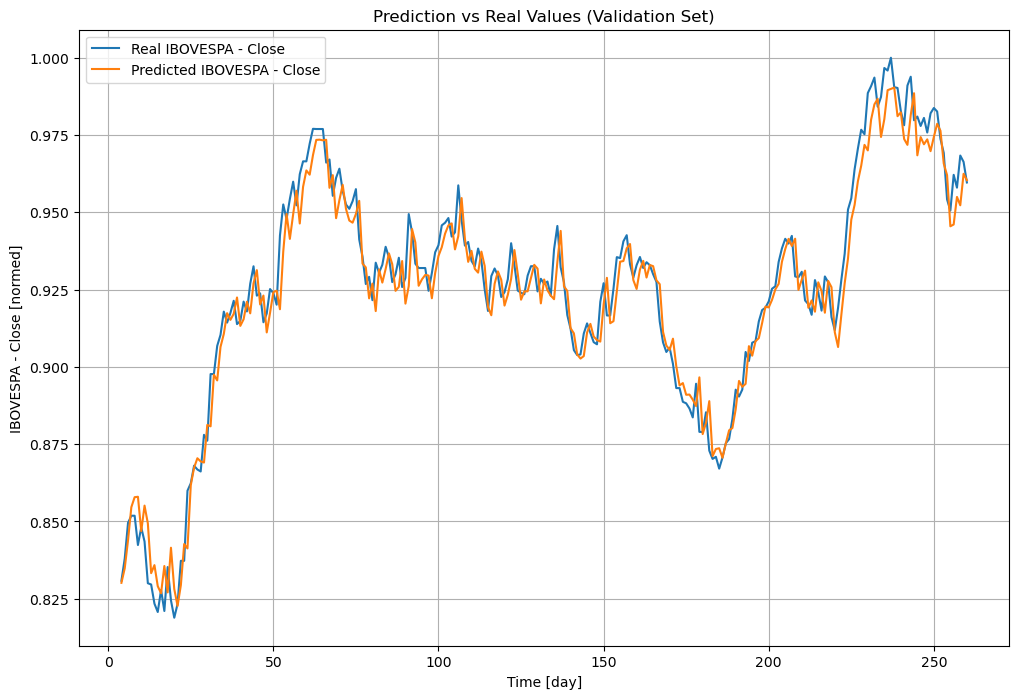

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


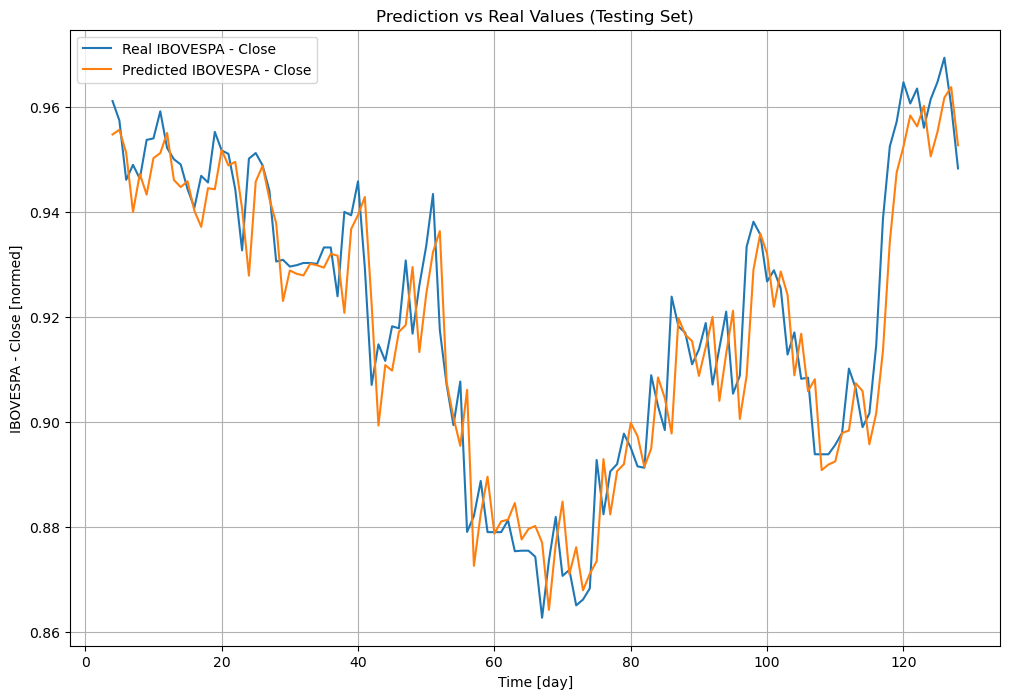

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

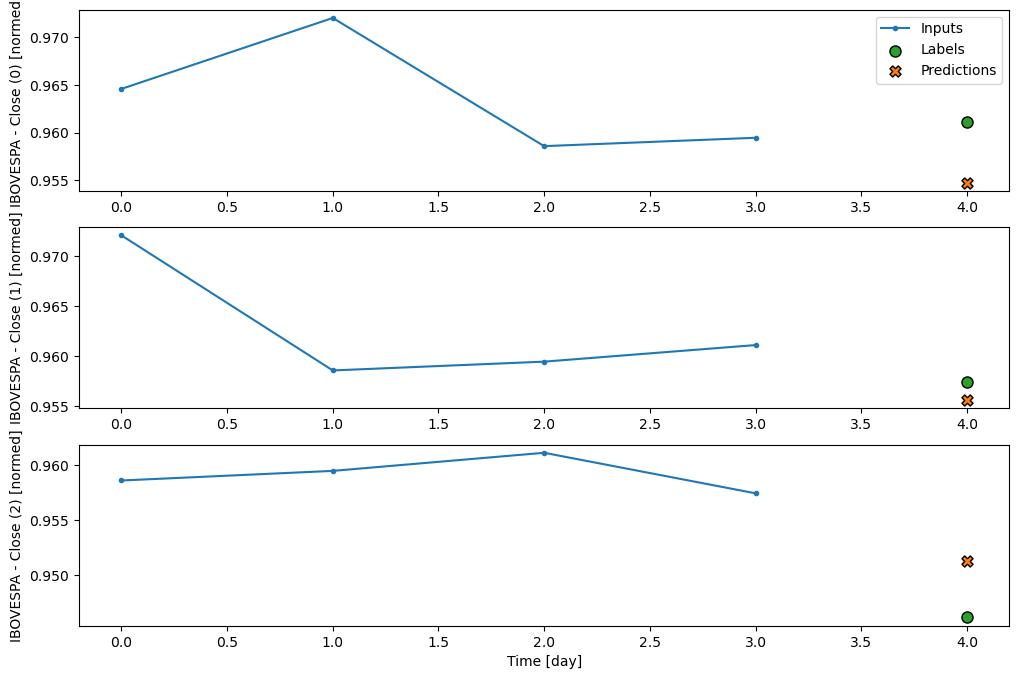

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:32s:27ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[[0.9547523 , 0.9547523 , 0.9547523 , ..., 0.9547523 ,
         0.9547523 , 0.9547523 ]],

       [[0.9556354 , 0.9556354 , 0.9556354 , ..., 0.9556354 ,
         0.9556354 , 0.9556354 ]],

       [[0.95126104, 0.95126104, 0.95126104, ..., 0.95126104,
         0.95126104, 0.95126104]],

       ...,

       [[0.96176803, 0.96176803, 0.96176803, ..., 0.96176803,
         0.96176803, 0.96176803]],

       [[0.9637666 , 0.9637666 , 0.9637666 , ..., 0.9637666 ,
         0.9637666 , 0.9637666 ]],

       [[0.95269334, 0.95269334, 0.95269334, ..., 0.95269334,
         0.95269334, 0.95269334]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')